In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

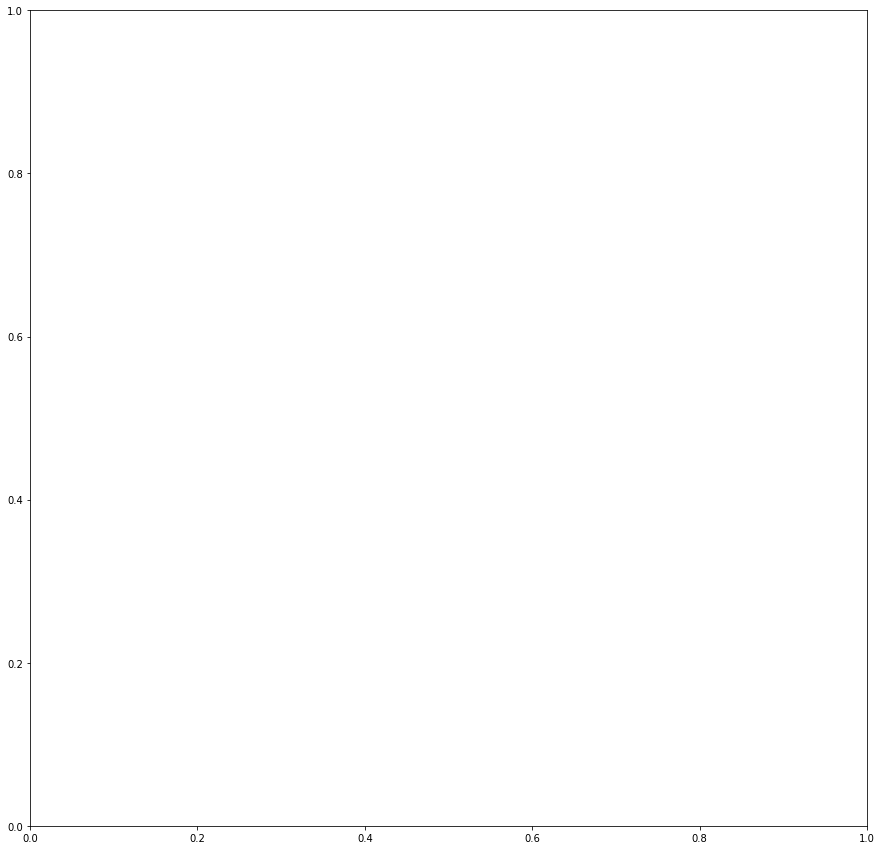

In [3]:
#Dataset Generation
n_point = 1000
x_data = np.random.normal(loc = 0 , scale = 2, size = (n_point,1))
y_data = x_data + 0.2*np.random.normal(loc = 0 , scale = 2, size = (n_point,1))

#Dataset Visualization
fig, ax = plt.subplots(figsize =(15,15))
ax.plot = (x_data, y_data, 'bo')

In [4]:
#%matplotlib qt

In [5]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.input_size, self.output_size =input_size, output_size
        self.fc1 = nn.Linear(self.input_size, self.output_size)
    
    def forward(self, x): # sigmoid까지 해서 backprop 까지.
        return self.sigmoid(self.fc1(x))

input_size, output_size = 2,1 # input 1개, output 2개
model = LinearRegression(input_size, output_size)
print(model)

LinearRegression(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)


In [6]:
print(model.state_dict())

OrderedDict([('fc1.weight', tensor([[ 0.0600, -0.2961]])), ('fc1.bias', tensor([-0.4835]))])


딕셔너리. 현재 weight와 bias가 자동으로 초기화 됨.

In [7]:
state_dict = model.state_dict()
print(state_dict['fc1.weight'])
print(state_dict['fc1.bias'])

tensor([[ 0.0600, -0.2961]])
tensor([-0.4835])


In [8]:
weight = state_dict['fc1.weight']
bias = state_dict['fc1.bias']
print(state_dict['fc1.weight'].shape)
print(state_dict['fc1.bias'].shape)

torch.Size([1, 2])
torch.Size([1])


In [9]:
print(weight.shape)
print(weight[0])
print(weight[1])

torch.Size([1, 2])
tensor([ 0.0600, -0.2961])


IndexError: index 1 is out of bounds for dimension 0 with size 1

weight[0] 는 첫번째 뉴런의 weight임을 의미
weight[1] 는 두번째 뉴런의 weight임을 의미. 그림으로 이해하면 쉬움

output, input 개수 랑 해서 이해하기..

In [ ]:
input_size, output_size = 1, 1 # input 1개, output 1개
model = LinearRegression(input_size, output_size)

lr = 0.001
epochs = 1000
check_freq = 101 # 몇번째마다 체크할건지, validation 할건지 등. practical tip! 홀수로 준다.

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

loss_list = []

x_data = torch.tensor(x_data, dtype = torch.float)
y_data = torch.tensor(y_data, dtype = torch.float)

for i in range(epochs):
    savefig(i)
    
    """
    pred = model(x_data)
    
    optimizer.zero_grad()
    loss = criterion(pred, y_data)
    loss.backward()
    optimizer.step()
    
    loss_list.append(loss.detach().numpy()) #detach()는 variable을 텐서로 
    """
    
    

In [ ]:
def savefig(i):
    fig, (ax1, ax2) = plt.subplots(2,1,figsize = (15,15))
    ax1.plot(loss_list)
    #ax2.plot(x_data, y_data, 'bo') 
    """
    x_min, x_max = x_data.min().numpy(), x_data.max().numpy()
    weight = model.state_dict()['fc1.weight'][0][0].numpy()
    bias = model.state_dict()['fc1.bias'][0].numpy()
    
    y0 = x_min * weight + bias
    y1 = x_max * weight + bias
    
    ax2.plot([x_min, x_max], [y0, y1], 'r', linewidth = 3) # 우리 모델의 선을 빨갛게 그려봅시다.
    fig.savefig('.\model' + str(fig_idx) + str(".png"))
    """

In [10]:


print(weight, bias)

tensor([[ 0.0600, -0.2961]]) tensor([-0.4835])
